In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
cols = np.loadtxt('data/ex1data2.txt',delimiter=',',unpack=True)
x = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))

m = y.size

x = np.insert(x,0,1,axis=1)

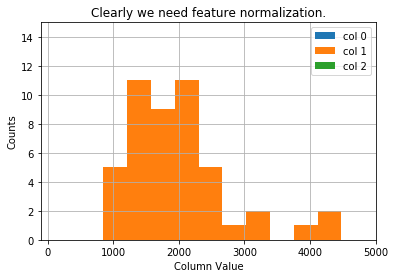

In [46]:
plt.grid(True)
plt.xlim([-100,5000])
plt.ylim([0,15]) 
aummy = plt.hist(x[:,0],label="col 0")
aummy = plt.hist(x[:,1],label="col 1")
aummy = plt.hist(x[:,2],label="col 2")
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
aummy = plt.legend()

In [61]:
#计算彼岸准车方差

#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = x.copy()

for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    if not icol : continue #过滤0列
    Xnorm[:,icol] = (Xnorm[:,icol]-stored_feature_means[-1])/stored_feature_stds[-1] 
    #数据减去平均数再除以标准差   是数据的标准化   也是标准差的标准化    符合正太分布

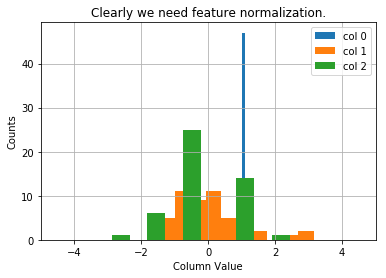

In [62]:
plt.grid(True)
plt.xlim([-5,5])
aummy = plt.hist(Xnorm[:,0],label="col 0")
aummy = plt.hist(Xnorm[:,1],label="col 1")
aummy = plt.hist(Xnorm[:,2],label="col 2")
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
aummy = plt.legend()

In [78]:
alpha = 0.01
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(1500):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

In [75]:
initial_theta = np.zeros((Xnorm.shape[1],1))
theta,thetahistory , jvec = descendGradient(Xnorm,initial_theta)

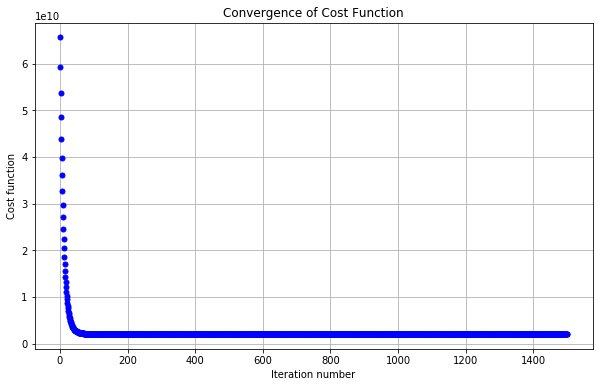

In [79]:
#Plot the convergence of the cost function
iterations = 1500
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'b.',markersize=10)
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])

plotConvergence(jvec)

In [82]:
#print "Final result theta parameters: \n",theta
print ("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print ("$%0.2f"%float(h(theta,ytestscaled)))

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
$293081.46


In [83]:
from numpy.linalg import inv
#导入求逆矩阵def 
#θ=(XTX)−1XT~y.
def normEqtn(x,y):
    return np.dot(np.dot(inv(np.dot(x.T,x)),x.T),y)

In [96]:
print ("正规化等式预测价格 house with 1650 square feet and 3 bedrooms")
print("$%0.2f" % float(h(normEqtn(x,y),[1,1650.,3])))

正规化等式预测价格 house with 1650 square feet and 3 bedrooms
$293081.46
